**Master IASD**  
**Deep Learning for Image Analisis**

Practical Session #1

In this practical work we seek to compare the performance of different models in the supervised classification task.

Santiago VELASCO-FORERO

Santiago.Velasco@mines-paristech.fr

Deadline: Oct 10 / 2024

In [1]:
#pip install --upgrade keras
#import os
#os.environ["KERAS_BACKEND"] = "jax"
#os.environ["KERAS_BACKEND"] = "pytorch"
#os.environ["KERAS_BACKEND"] = "tensorflow"
import numpy as np
import matplotlib.pyplot as plt
import keras
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
print(keras.__version__)

3.4.1


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


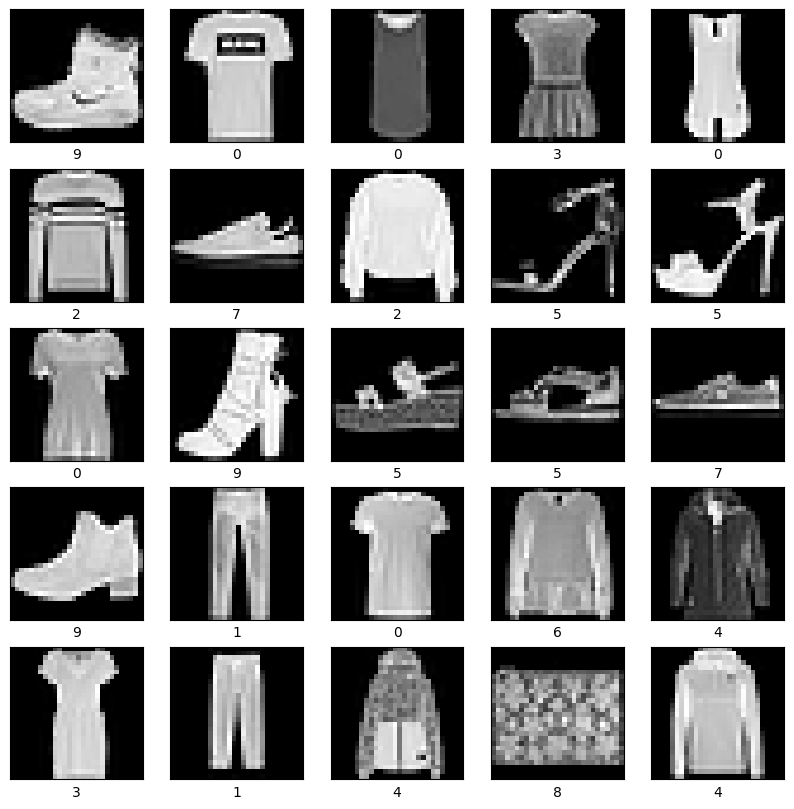

(28, 28)


In [2]:
#Fashion_MNIST
#https://en.wikipedia.org/wiki/Fashion_MNIST
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()
train_images=train_images/255.
test_images=test_images/255.

# Visualize some examples
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap='gray')
    plt.xlabel(train_labels[i])
plt.show()

print(train_images[i].shape)

In [6]:
input_shape=(28,28,1)
num_classes=10

def make_model(input_shape,num_classes):
  #input_shape: The shape of the input images, typically in the form (height, width, channels) where:
  #height is the image height,
  #width is the image width,
  #channels is the number of color channels (e.g., 3 for RGB images).
  #num_classes: The number of possible output categories (i.e., the number of classes for classification).
  input_layer=keras.Input(shape=input_shape)
  conv1=keras.layers.Conv2D(16, kernel_size=(3, 3), activation="relu")(input_layer)
  conv2=keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu")(conv1)
  pool=keras.layers.MaxPooling2D(pool_size=(2, 2),strides=(2,2))(conv2)
  conv3=keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu")(pool)
  conv4=keras.layers.Conv2D(96, kernel_size=(3, 3), activation="relu")(conv3)
  globalpool=keras.layers.GlobalAveragePooling2D()(conv4)
  dense = keras.layers.Dense(num_classes, activation="softmax")(globalpool)
  return keras.Model(input_layer,dense)

In [ ]:
model0 = make_model(input_shape,num_classes)
model0.summary()
optimizer = keras.optimizers.SGD(learning_rate=1.)
model0.compile(optimizer=optimizer,loss="sparse_categorical_crossentropy",metrics=["accuracy"])

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 10, 10, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 8, 96)            │          55,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 96)                  │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │             970 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,658 (311.16 KB)

 Trainable params: 79,658 (311.16 KB)

 Non-trainable params: 0 (0.00 B)

Question 1: Explain for each layer how the number of parameters is calculated.

-Conv2d : (9+1)xdimension = 10x16 = 160


-Conv2d_1: (9xdimension_precedent +1)xdimension = (9x16+1)x32 = 4640


-max_poom : no learning parameters


-conv2d_2 : same formula = (9x32+1)x64= 18496


-conv2d_3 : same formula = (9x64 + 1)x96 = 55392


-global_agv_pooling2d : no learning parameters


-dense : Fully connected layer :  (taille_pred + 1) x taille = 96x10 = 960

In [ ]:
num_epochs=36

In [ ]:

history_model0 = model0.fit(
        train_images, train_labels,
        validation_split=0.2,
        epochs=num_epochs,
    )

Epoch 1/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.1011 - loss: 2.3102 - val_accuracy: 0.1030 - val_loss: 2.3079
Epoch 2/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.0999 - loss: 2.3101 - val_accuracy: 0.1003 - val_loss: 2.3103
Epoch 3/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.0985 - loss: 2.3096 - val_accuracy: 0.1003 - val_loss: 2.3109
Epoch 4/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.0999 - loss: 2.3102 - val_accuracy: 0.0957 - val_loss: 2.3108
Epoch 5/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0991 - loss: 2.3101 - val_accuracy: 0.1005 - val_loss: 2.3088
Epoch 6/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1023 - loss: 2.3098 - val_accuracy: 0.0983 - val_loss: 2.3092
Epoch 7/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0992 - loss: 2.3103 - val_accuracy: 0.1005 - val_loss: 2.3062
Epoch 8/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1021 - loss: 2.3102 - 

In [3]:
def make_plot_history(history):
  #Visualize the training process of a neural network by plotting the accuracy and loss over the training epochs for both the training set and validation set.
  #It uses Matplotlib, a popular plotting library in Python, to generate two subplots: one for accuracy and one for loss.
  plt.figure()
  plt.subplot(2,1,1)
  plt.plot(history.history['accuracy'],label='Training')
  plt.plot(history.history['val_accuracy'],label='Validation')
  plt.grid('on')
  plt.legend()
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.subplot(2,1,2)
  plt.plot(history.history['loss'],label='Training')
  plt.plot(history.history['val_loss'],label='Validation')
  plt.grid('on')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

def make_model_analysis(model,x_test,y_test):
  #Function is designed to evaluate a trained neural network model by predicting the classes of test data (x_test) and comparing them to the true labels (y_test).
  #It also generates a classification report that provides detailed performance metrics for each class.
  #classification_report: This function (from Scikit-learn) generates a detailed report of the model’s performance for each class. It includes the following metrics:
  #Precision: The ratio of true positive predictions to the total predicted positives.
  #Recall (Sensitivity): The ratio of true positive predictions to the total actual positives.
  #F1-score: The harmonic mean of precision and recall.
  #Support: The number of true instances for each class.
  y_pred=np.argmax(model.predict(x_test),axis=1)
  print(y_pred.shape)
  print('Predicted Classes', np.unique(y_pred))
  print('Truth Classes', np.unique(y_test))
  target_names = ['T-Shirt', 'Trouser', 'Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']
  print(classification_report(y_test,y_pred,target_names=target_names))

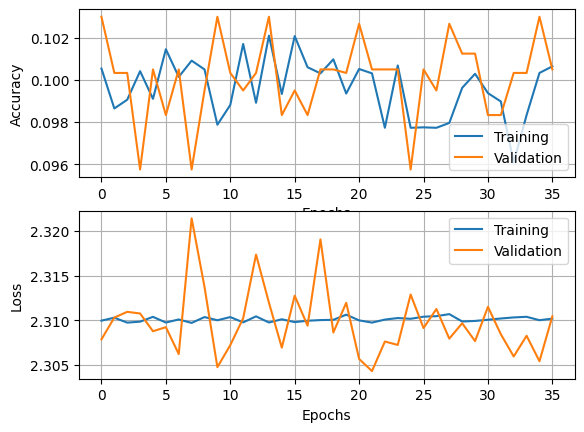

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
(10000,)
Predicted Classes [1]
Truth Classes [0 1 2 3 4 5 6 7 8 9]
              precision    recall  f1-score   support

     T-Shirt       0.00      0.00      0.00      1000
     Trouser       0.10      1.00      0.18      1000
    Pullover       0.00      0.00      0.00      1000
       Dress       0.00      0.00      0.00      1000
        Coat       0.00      0.00      0.00      1000
      Sandal       0.00      0.00      0.00      1000
       Shirt       0.00      0.00      0.00      1000
     Sneaker       0.00      0.00      0.00      1000
         Bag       0.00      0.00      0.00      1000
  Ankle Boot       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
make_plot_history(history_model0)
make_model_analysis(model0,test_images,test_labels)

Note: The model is not learning.

Q1. Change the learning_rate to a value of 0.001 and train a new model. Call this new model: model1

In [ ]:
#Your code for answer Q1:
model1 = make_model(input_shape,num_classes)
model1.summary()
optimizer = keras.optimizers.SGD(learning_rate = 0.001)
model1.compile(optimizer=optimizer,loss="sparse_categorical_crossentropy",metrics=["accuracy"])

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 24, 24, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 10, 10, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 8, 8, 96)            │          55,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 96)                  │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             970 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,658 (311.16 KB)

 Trainable params: 79,658 (311.16 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_model1 = model1.fit(
        train_images, train_labels,
        validation_split=0.2,
        epochs=num_epochs,
    )

Epoch 1/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.1005 - loss: 2.3012 - val_accuracy: 0.0989 - val_loss: 2.2942
Epoch 2/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1033 - loss: 2.2904 - val_accuracy: 0.1331 - val_loss: 2.2782
Epoch 3/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1422 - loss: 2.2713 - val_accuracy: 0.1217 - val_loss: 2.2496
Epoch 4/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1307 - loss: 2.2402 - val_accuracy: 0.1768 - val_loss: 2.2061
Epoch 5/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.2011 - loss: 2.1876 - val_accuracy: 0.3638 - val_loss: 2.0964
Epoch 6/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4328 - loss: 2.0005 - val_accuracy: 0.5883 - val_loss: 1.4148
Epoch 7/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5765 - loss: 1.2651 - val_accuracy: 0.6036 - val_loss: 1.0373
Epoch 8/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6071 - loss: 1.0352 - 

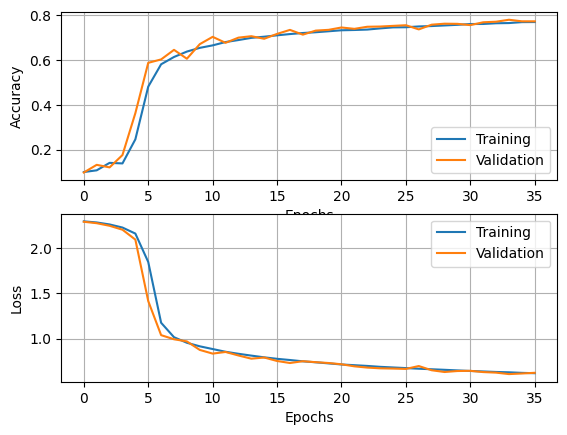

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
(10000,)
Predicted Classes [0 1 2 3 4 5 6 7 8 9]
Truth Classes [0 1 2 3 4 5 6 7 8 9]
              precision    recall  f1-score   support

     T-Shirt       0.75      0.77      0.76      1000
     Trouser       0.98      0.91      0.94      1000
    Pullover       0.48      0.77      0.59      1000
       Dress       0.77      0.79      0.78      1000
        Coat       0.57      0.64      0.60      1000
      Sandal       0.95      0.85      0.90      1000
       Shirt       0.34      0.09      0.14      1000
     Sneaker       0.85      0.90      0.87      1000
         Bag       0.90      0.93      0.91      1000
  Ankle Boot       0.90      0.93      0.92      1000

    accuracy                           0.76     10000
   macro avg       0.75      0.76      0.74     10000
weighted avg       0.75      0.76      0.74     10000



In [ ]:
make_plot_history(history_model1)
make_model_analysis(model1,test_images,test_labels)

Q2. Change the optimizer from SGD to Adam. Call this model as "model2".

In [ ]:
#Your code for answer Q2:
model2 = make_model(input_shape,num_classes)
model2.summary()
optimizer = keras.optimizers.Adam(learning_rate = 0.001)
model2.compile(optimizer=optimizer,loss="sparse_categorical_crossentropy",metrics=["accuracy"])

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 24, 24, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 10, 10, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 8, 8, 96)            │          55,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (None, 96)                  │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             970 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,658 (311.16 KB)

 Trainable params: 79,658 (311.16 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_model2 = model2.fit(
        train_images, train_labels,
        validation_split=0.2,
        epochs=num_epochs,
    )

Epoch 1/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6200 - loss: 1.0300 - val_accuracy: 0.8014 - val_loss: 0.5435
Epoch 2/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8084 - loss: 0.5262 - val_accuracy: 0.8475 - val_loss: 0.4311
Epoch 3/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8453 - loss: 0.4304 - val_accuracy: 0.8614 - val_loss: 0.3858
Epoch 4/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8648 - loss: 0.3712 - val_accuracy: 0.8733 - val_loss: 0.3576
Epoch 5/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8782 - loss: 0.3389 - val_accuracy: 0.8773 - val_loss: 0.3355
Epoch 6/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8899 - loss: 0.3116 - val_accuracy: 0.8843 - val_loss: 0.3183
Epoch 7/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8952 - loss: 0.2878 - val_accuracy: 0.8935 - val_loss: 0.2979
Epoch 8/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9043 - loss: 0.2679 - 

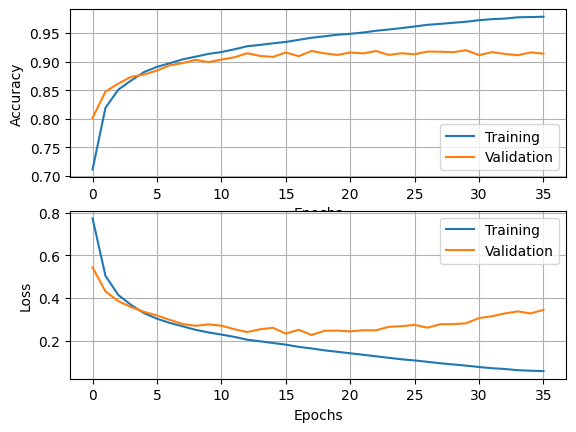

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
(10000,)
Predicted Classes [0 1 2 3 4 5 6 7 8 9]
Truth Classes [0 1 2 3 4 5 6 7 8 9]
              precision    recall  f1-score   support

     T-Shirt       0.90      0.83      0.86      1000
     Trouser       1.00      0.98      0.99      1000
    Pullover       0.88      0.88      0.88      1000
       Dress       0.85      0.95      0.90      1000
        Coat       0.90      0.84      0.87      1000
      Sandal       0.99      0.98      0.98      1000
       Shirt       0.74      0.78      0.76      1000
     Sneaker       0.96      0.98      0.97      1000
         Bag       0.99      0.98      0.98      1000
  Ankle Boot       0.97      0.96      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [ ]:
make_plot_history(history_model2)
make_model_analysis(model2,test_images,test_labels)

Q3: What is your analysis about the performance of Model2?

While Model O did not learn and Model 1 underfit. Model 2 outperform these previous models and learn. The accuracy on the validation set is around 91% same for the recall and the f1-score. Its performance could be increased if more data was available to fit the model.

Q4: Create you create a function "make_model_with_layer_normalization" to define a model as before but adding "LayerNormalization" layer in between each Conv2D and Activation layer. Call this model as "model3"

In [ ]:
#Your code for answer Q4:
def make_model_with_layer_normalization(input_shape,num_classes):
  input_layer=keras.Input(shape=input_shape)
  conv1=keras.layers.Conv2D(16, kernel_size=(3, 3), activation= None)(input_layer)
  norm1=keras.layers.Normalization()(conv1)
  acti1=keras.layers.Activation(keras.activations.relu)(norm1)
  conv2=keras.layers.Conv2D(32, kernel_size=(3, 3), activation= None)(acti1)
  norm2=keras.layers.Normalization()(conv2)
  acti2=keras.layers.Activation(keras.activations.relu)(norm2)
  pool=keras.layers.MaxPooling2D(pool_size=(2, 2),strides=(2,2))(acti2)
  conv3=keras.layers.Conv2D(64, kernel_size=(3, 3), activation=None)(pool)
  norm3=keras.layers.Normalization()(conv3)
  acti3=keras.layers.Activation(keras.activations.relu)(norm3)
  conv4=keras.layers.Conv2D(96, kernel_size=(3, 3), activation=None)(acti3)
  norm4=keras.layers.Normalization()(conv4)
  acti4=keras.layers.Activation(keras.activations.relu)(norm4)
  globalpool=keras.layers.GlobalAveragePooling2D()(acti4)
  dense = keras.layers.Dense(num_classes, activation="softmax")(globalpool)
  return keras.Model(input_layer,dense)

In [ ]:
model3 = make_model_with_layer_normalization(input_shape,num_classes)
model3.summary()
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model3.compile(optimizer=optimizer,loss="sparse_categorical_crossentropy",metrics=["accuracy"])

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ normalization (Normalization)        │ (None, 26, 26, 16)          │              33 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 26, 26, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 24, 24, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ normalization_1 (Normalization)      │ (None, 24, 24, 32)          │              65 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 10, 10, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ normalization_2 (Normalization)      │ (None, 10, 10, 64)          │             129 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 8, 8, 96)            │          55,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ normalization_3 (Normalization)      │ (None, 8, 8, 96)            │             193 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 8, 8, 96)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_3           │ (None, 96)                  │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             970 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 80,078 (312.82 KB)

 Trainable params: 79,658 (311.16 KB)

 Non-trainable params: 420 (1.66 KB)

In [ ]:
history_model3 = model3.fit(
        train_images, train_labels,
        validation_split=0.2,
        epochs=num_epochs,
    )

Epoch 1/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.6197 - loss: 1.0145 - val_accuracy: 0.7880 - val_loss: 0.5650
Epoch 2/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8079 - loss: 0.5291 - val_accuracy: 0.8424 - val_loss: 0.4306
Epoch 3/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8429 - loss: 0.4312 - val_accuracy: 0.8571 - val_loss: 0.3990
Epoch 4/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8618 - loss: 0.3786 - val_accuracy: 0.8687 - val_loss: 0.3560
Epoch 5/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8781 - loss: 0.3388 - val_accuracy: 0.8827 - val_loss: 0.3266
Epoch 6/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8874 - loss: 0.3083 - val_accuracy: 0.8890 - val_loss: 0.3119
Epoch 7/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8979 - loss: 0.2807 - val_accuracy: 0.9003 - val_loss: 0.2776
Epoch 8/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9051 - loss: 0.2666 -

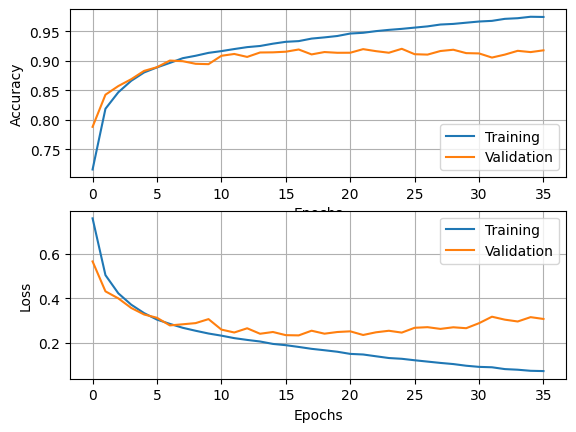

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
(10000,)
Predicted Classes [0 1 2 3 4 5 6 7 8 9]
Truth Classes [0 1 2 3 4 5 6 7 8 9]
              precision    recall  f1-score   support

     T-Shirt       0.86      0.83      0.85      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.85      0.90      0.88      1000
       Dress       0.90      0.91      0.90      1000
        Coat       0.84      0.90      0.87      1000
      Sandal       0.99      0.98      0.99      1000
       Shirt       0.79      0.70      0.74      1000
     Sneaker       0.95      0.98      0.96      1000
         Bag       0.98      0.98      0.98      1000
  Ankle Boot       0.98      0.95      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [ ]:
make_plot_history(history_model3)
make_model_analysis(model3,test_images,test_labels)

Text(0, 0.5, 'Validation Accuracy')

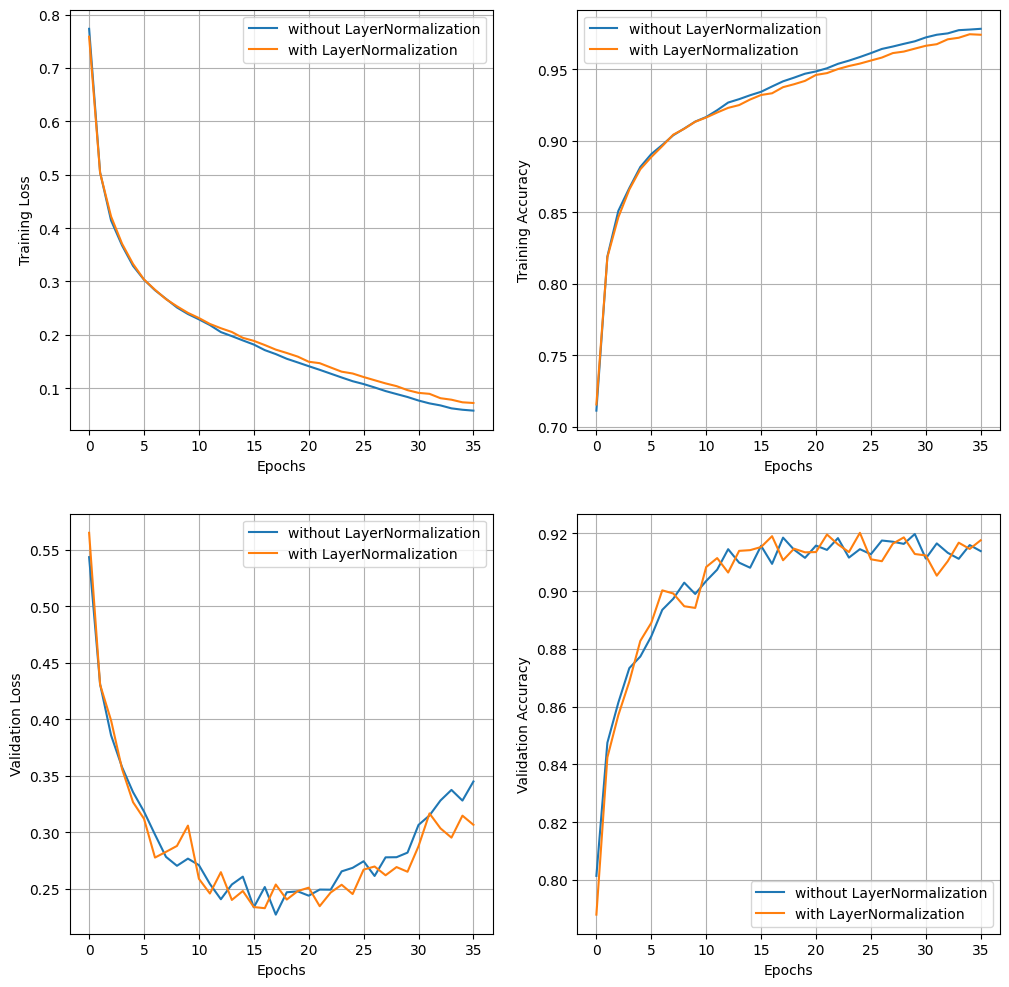

In [ ]:
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.plot(history_model2.history['loss'],label='without LayerNormalization')
plt.plot(history_model3.history['loss'],label='with LayerNormalization')
plt.legend()
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.subplot(2,2,2)
plt.plot(history_model2.history['accuracy'],label='without LayerNormalization')
plt.plot(history_model3.history['accuracy'],label='with LayerNormalization')
plt.legend()
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.subplot(2,2,3)
plt.plot(history_model2.history['val_loss'],label='without LayerNormalization')
plt.plot(history_model3.history['val_loss'],label='with LayerNormalization')
plt.legend()
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.subplot(2,2,4)
plt.plot(history_model2.history['val_accuracy'],label='without LayerNormalization')
plt.plot(history_model3.history['val_accuracy'],label='with LayerNormalization')
plt.legend()
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')

Q5: What is your analysis about the performance of Model3?

Model 3 seems to overfit a little bit more than model 2.

Q6: Create you create a function "make_model_with_layer_normalization_and_dropout" to define a model as before but including a dropout layer after global pooling. Call this model as "model4"

In [7]:
#Your code for answer Q6:
def make_model_with_layer_normalization_and_dropout(input_shape,num_classes):
  input_layer=keras.Input(shape=input_shape)
  input_layer=keras.Input(shape=input_shape)
  conv1=keras.layers.Conv2D(16, kernel_size=(3, 3), activation= None)(input_layer)
  norm1=keras.layers.Normalization()(conv1)
  acti1=keras.layers.Activation(keras.activations.relu)(norm1)
  conv2=keras.layers.Conv2D(32, kernel_size=(3, 3), activation= None)(acti1)
  norm2=keras.layers.Normalization()(conv2)
  acti2=keras.layers.Activation(keras.activations.relu)(norm2)
  pool=keras.layers.MaxPooling2D(pool_size=(2, 2),strides=(2,2))(acti2)
  pool=keras.layers.Dropout(.1)(pool)
  conv3=keras.layers.Conv2D(64, kernel_size=(3, 3), activation=None)(pool)
  norm3=keras.layers.Normalization()(conv3)
  acti3=keras.layers.Activation(keras.activations.relu)(norm3)
  conv4=keras.layers.Conv2D(96, kernel_size=(3, 3), activation=None)(acti3)
  norm4=keras.layers.Normalization()(conv4)
  acti4=keras.layers.Activation(keras.activations.relu)(norm4)
  globalpool=keras.layers.GlobalAveragePooling2D()(acti4)
  globalpool=keras.layers.Dropout(.1)(globalpool)
  dense = keras.layers.Dense(num_classes, activation="softmax")(globalpool)
  return keras.Model(input_layer,dense)

In [8]:
model4 = make_model_with_layer_normalization_and_dropout(input_shape,num_classes)
model4.summary()
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model4.compile(optimizer=optimizer,loss="sparse_categorical_crossentropy",metrics=["accuracy"])

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ normalization (Normalization)        │ (None, 26, 26, 16)          │              33 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 26, 26, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ normalization_1 (Normalization)      │ (None, 24, 24, 32)          │              65 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 10, 10, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ normalization_2 (Normalization)      │ (None, 10, 10, 64)          │             129 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 8, 96)            │          55,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ normalization_3 (Normalization)      │ (None, 8, 8, 96)            │             193 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 8, 8, 96)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 96)                  │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 96)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │             970 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 80,078 (312.82 KB)

 Trainable params: 79,658 (311.16 KB)

 Non-trainable params: 420 (1.66 KB)

In [ ]:
history_model4 = model4.fit(
        train_images, train_labels,
        validation_split=0.2,
        epochs=num_epochs,
    )

Epoch 1/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.6081 - loss: 1.0408 - val_accuracy: 0.8012 - val_loss: 0.5531
Epoch 2/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8007 - loss: 0.5495 - val_accuracy: 0.8322 - val_loss: 0.4605
Epoch 3/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8328 - loss: 0.4583 - val_accuracy: 0.8618 - val_loss: 0.3903
Epoch 4/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8527 - loss: 0.4058 - val_accuracy: 0.8623 - val_loss: 0.3743
Epoch 5/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8688 - loss: 0.3614 - val_accuracy: 0.8762 - val_loss: 0.3503
Epoch 6/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8812 - loss: 0.3331 - val_accuracy: 0.8920 - val_loss: 0.2991
Epoch 7/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8865 - loss: 0.3131 - val_accuracy: 0.8957 - val_loss: 0.2856
Epoch 8/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8917 - loss: 0.2968 - 

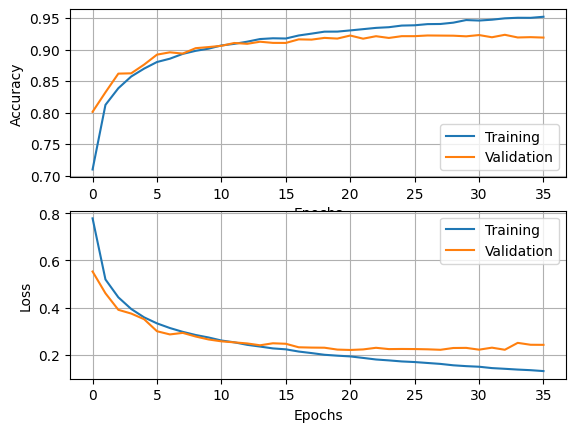

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
(10000,)
Predicted Classes [0 1 2 3 4 5 6 7 8 9]
Truth Classes [0 1 2 3 4 5 6 7 8 9]
              precision    recall  f1-score   support

     T-Shirt       0.91      0.81      0.86      1000
     Trouser       1.00      0.98      0.99      1000
    Pullover       0.91      0.86      0.89      1000
       Dress       0.92      0.93      0.92      1000
        Coat       0.88      0.90      0.89      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.72      0.82      0.77      1000
     Sneaker       0.97      0.97      0.97      1000
         Bag       0.98      0.99      0.98      1000
  Ankle Boot       0.98      0.97      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [ ]:
make_plot_history(history_model4)
make_model_analysis(model4,test_images,test_labels)

Q7: Select the best configuration and train this network for 128 epochs, including:
- A reduced learning rate and an early stopping callback.
- Save the best model.
- Plot the confusion matrix of the best model.
- Show examples where the network is not classifing correctly.

Help: https://keras.io/api/callbacks/


In [10]:
def schedule(epoch, lr):
    if epoch%20 ==0:
        lr = lr*(1/(1+epoch))**0.3
    return lr

In [11]:
#Include the answer of the Q7

num_epochs=128

model_best = model4
model_best.summary()
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model_best.compile(optimizer=optimizer,loss="sparse_categorical_crossentropy",metrics=["accuracy"])

reduce_lr = keras.callbacks.LearningRateScheduler(schedule)
early_stopping = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=10,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0)

history_model5 = model_best.fit(
        train_images, train_labels,
        validation_split=0.2,
        epochs=num_epochs,
        callbacks=[reduce_lr,early_stopping]
    )

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ normalization (Normalization)        │ (None, 26, 26, 16)          │              33 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 26, 26, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ normalization_1 (Normalization)      │ (None, 24, 24, 32)          │              65 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 10, 10, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ normalization_2 (Normalization)      │ (None, 10, 10, 64)          │             129 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 8, 96)            │          55,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ normalization_3 (Normalization)      │ (None, 8, 8, 96)            │             193 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 8, 8, 96)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 96)                  │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 96)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │             970 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 80,078 (312.82 KB)

 Trainable params: 79,658 (311.16 KB)

 Non-trainable params: 420 (1.66 KB)

Epoch 1/128
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.6145 - loss: 1.0363 - val_accuracy: 0.8032 - val_loss: 0.5399 - learning_rate: 0.0010
Epoch 2/128
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8003 - loss: 0.5390 - val_accuracy: 0.8414 - val_loss: 0.4309 - learning_rate: 0.0010
Epoch 3/128
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8400 - loss: 0.4418 - val_accuracy: 0.8453 - val_loss: 0.4254 - learning_rate: 0.0010
Epoch 4/128
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8597 - loss: 0.3892 - val_accuracy: 0.8837 - val_loss: 0.3318 - learning_rate: 0.0010
Epoch 5/128
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8742 - loss: 0.3474 - val_accuracy: 0.8898 - val_loss: 0.3118 - learning_rate: 0.0010
Epoch 6/128
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8860 - loss: 0.3150 - val_accuracy: 0.8913 - val_loss: 0.2988 - learning_rate: 0.0010
Epoch 7/128
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 

In [12]:

target_names = ['T-Shirt', 'Trouser', 'Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']
def afficher_matrice_de_confusion(cm, labels):
    plt.figure(figsize=(8, 6))

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=labels, yticklabels=labels, linewidths=0.5, linecolor='black')

    plt.xlabel('Prédictions', fontsize=12)
    plt.ylabel('Vérités', fontsize=12)
    plt.title('Matrice de Confusion', fontsize=14)

    plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


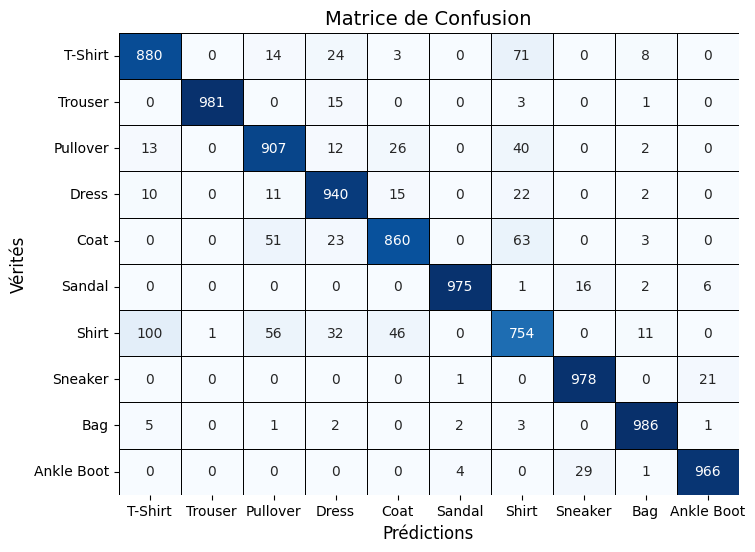

In [13]:
y_pred=np.argmax(model_best.predict(test_images),axis=1)
cm =  confusion_matrix(test_labels, y_pred)
afficher_matrice_de_confusion(cm,target_names)

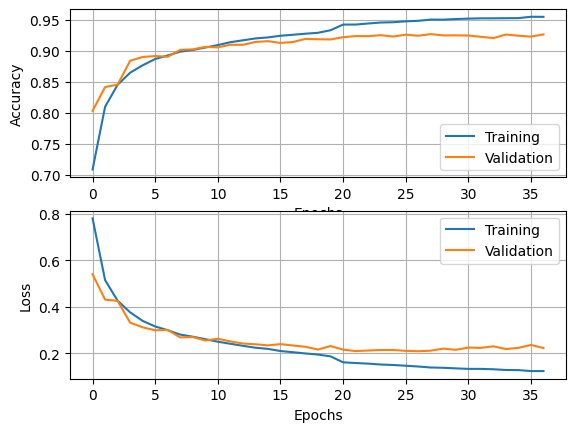

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
(10000,)
Predicted Classes [0 1 2 3 4 5 6 7 8 9]
Truth Classes [0 1 2 3 4 5 6 7 8 9]
              precision    recall  f1-score   support

     T-Shirt       0.87      0.88      0.88      1000
     Trouser       1.00      0.98      0.99      1000
    Pullover       0.87      0.91      0.89      1000
       Dress       0.90      0.94      0.92      1000
        Coat       0.91      0.86      0.88      1000
      Sandal       0.99      0.97      0.98      1000
       Shirt       0.79      0.75      0.77      1000
     Sneaker       0.96      0.98      0.97      1000
         Bag       0.97      0.99      0.98      1000
  Ankle Boot       0.97      0.97      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [14]:
make_plot_history(history_model5)
make_model_analysis(model_best,test_images,test_labels)

In [ ]:
missclassified_indices = np.where(y_pred != test_labels)[0]
misclassified_samples = test_images[missclassified_indices]
misclassified_true_labels = test_labels[missclassified_indices]
misclassified_pred_labels = y_pred[missclassified_indices]


Sample 2: True Label: 9, Predicted Label: 5


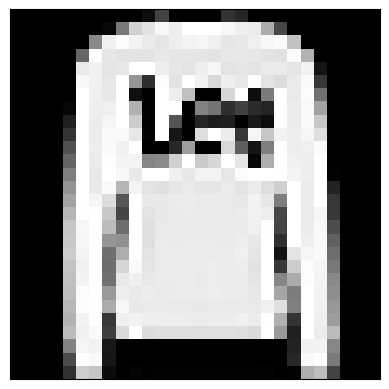

Sample 3: True Label: 3, Predicted Label: 6


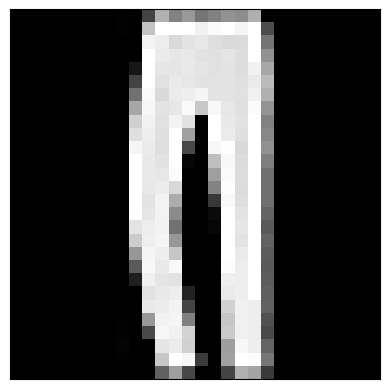

In [ ]:

for i in range(1,3):  # Display the first 5 misclassified samples
    print(f"Sample {i+1}: True Label: {misclassified_true_labels[i]}, Predicted Label: {misclassified_pred_labels[i]}")
    plt.plot(5,5)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap='gray')
    plt.show()

    # If your data is image data, you could use matplotlib to display images
    # plt.imshow(misclassified_samples[i], cmap='gray')  # Uncomment this for image data
    # plt.show()

In [17]:
filepath = r"model.keras"
keras.models.save_model(
model_best, filepath, overwrite=True)

In [16]:
#Your code for answer Q6:
def make_model_with_layer_batch_normalization_and_dropout(input_shape,num_classes):
  input_layer=keras.Input(shape=input_shape)
  conv1=keras.layers.Conv2D(16, kernel_size=(3, 3), activation= None)(input_layer)
  norm1=keras.layers.BatchNormalization()(conv1)
  acti1=keras.layers.Activation(keras.activations.relu)(norm1)
  conv2=keras.layers.Conv2D(32, kernel_size=(3, 3), activation= None)(acti1)
  norm2=keras.layers.BatchNormalization()(conv2)
  acti2=keras.layers.Activation(keras.activations.relu)(norm2)
  pool=keras.layers.MaxPooling2D(pool_size=(2, 2),strides=(2,2))(acti2)
  pool=keras.layers.Dropout(.1)(pool)
  conv3=keras.layers.Conv2D(64, kernel_size=(3, 3), activation=None)(pool)
  norm3=keras.layers.BatchNormalization()(conv3)
  acti3=keras.layers.Activation(keras.activations.relu)(norm3)
  conv4=keras.layers.Conv2D(96, kernel_size=(3, 3), activation=None)(acti3)
  norm4=keras.layers.BatchNormalization()(conv4)
  acti4=keras.layers.Activation(keras.activations.relu)(norm4)
  globalpool=keras.layers.GlobalAveragePooling2D()(acti4)
  globalpool=keras.layers.Dropout(.1)(globalpool)
  dense = keras.layers.Dense(num_classes, activation="softmax")(globalpool)
  return keras.Model(input_layer,dense)

In [18]:
#Include the answer of the Q7

num_epochs=128

model5 = make_model_with_layer_batch_normalization_and_dropout(input_shape,num_classes)
model5.summary()
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model5.compile(optimizer=optimizer,loss="sparse_categorical_crossentropy",metrics=["accuracy"])

reduce_lr = keras.callbacks.LearningRateScheduler(schedule)
early_stopping = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=10,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0)

history_model6 = model5.fit(
        train_images, train_labels,
        validation_split=0.2,
        epochs=num_epochs,
        callbacks=[reduce_lr,early_stopping]
    )

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 26, 26, 16)          │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 26, 26, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 24, 24, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 24, 24, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 10, 10, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 10, 10, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 8, 8, 96)            │          55,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 8, 8, 96)            │             384 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_7 (Activation)            │ (None, 8, 8, 96)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 96)                  │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 96)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             970 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 80,490 (314.41 KB)

 Trainable params: 80,074 (312.79 KB)

 Non-trainable params: 416 (1.62 KB)

Epoch 1/128
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.7332 - loss: 0.7704 - val_accuracy: 0.7824 - val_loss: 0.5593 - learning_rate: 0.0010
Epoch 2/128
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - accuracy: 0.8569 - loss: 0.4034 - val_accuracy: 0.8748 - val_loss: 0.3481 - learning_rate: 0.0010
Epoch 3/128
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8750 - loss: 0.3445 - val_accuracy: 0.8746 - val_loss: 0.3503 - learning_rate: 0.0010
Epoch 4/128
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8864 - loss: 0.3172 - val_accuracy: 0.8815 - val_loss: 0.3139 - learning_rate: 0.0010
Epoch 5/128
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8956 - loss: 0.2937 - val_accuracy: 0.8961 - val_loss: 0.2771 - learning_rate: 0.0010
Epoch 6/128
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9005 - loss: 0.2754 - val_accuracy: 0.8572 - val_loss: 0.3741 - learning_rate: 0.0010
Epoch 7/128
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy

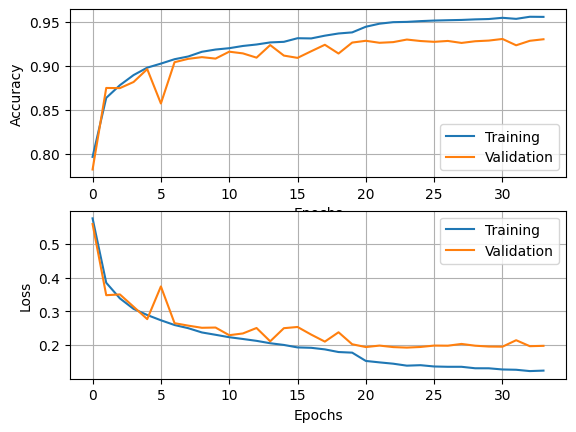

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
(10000,)
Predicted Classes [0 1 2 3 4 5 6 7 8 9]
Truth Classes [0 1 2 3 4 5 6 7 8 9]
              precision    recall  f1-score   support

     T-Shirt       0.87      0.86      0.87      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.89      0.91      0.90      1000
       Dress       0.91      0.93      0.92      1000
        Coat       0.90      0.90      0.90      1000
      Sandal       0.99      0.98      0.98      1000
       Shirt       0.79      0.78      0.78      1000
     Sneaker       0.94      0.99      0.97      1000
         Bag       0.99      0.99      0.99      1000
  Ankle Boot       0.99      0.95      0.97      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



In [19]:
make_plot_history(history_model6)
make_model_analysis(model5,test_images,test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


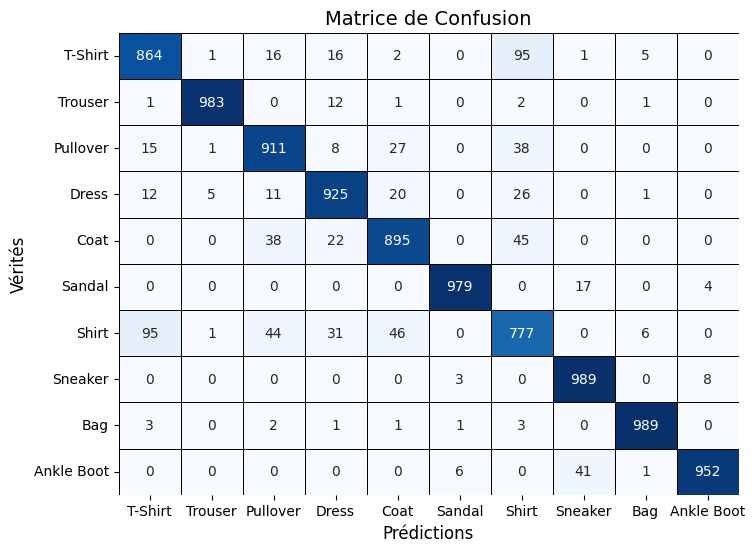

In [20]:
y_pred=np.argmax(model5.predict(test_images),axis=1)
cm =  confusion_matrix(test_labels, y_pred)
afficher_matrice_de_confusion(cm,target_names)

Text(0, 0.5, 'Validation Accuracy')

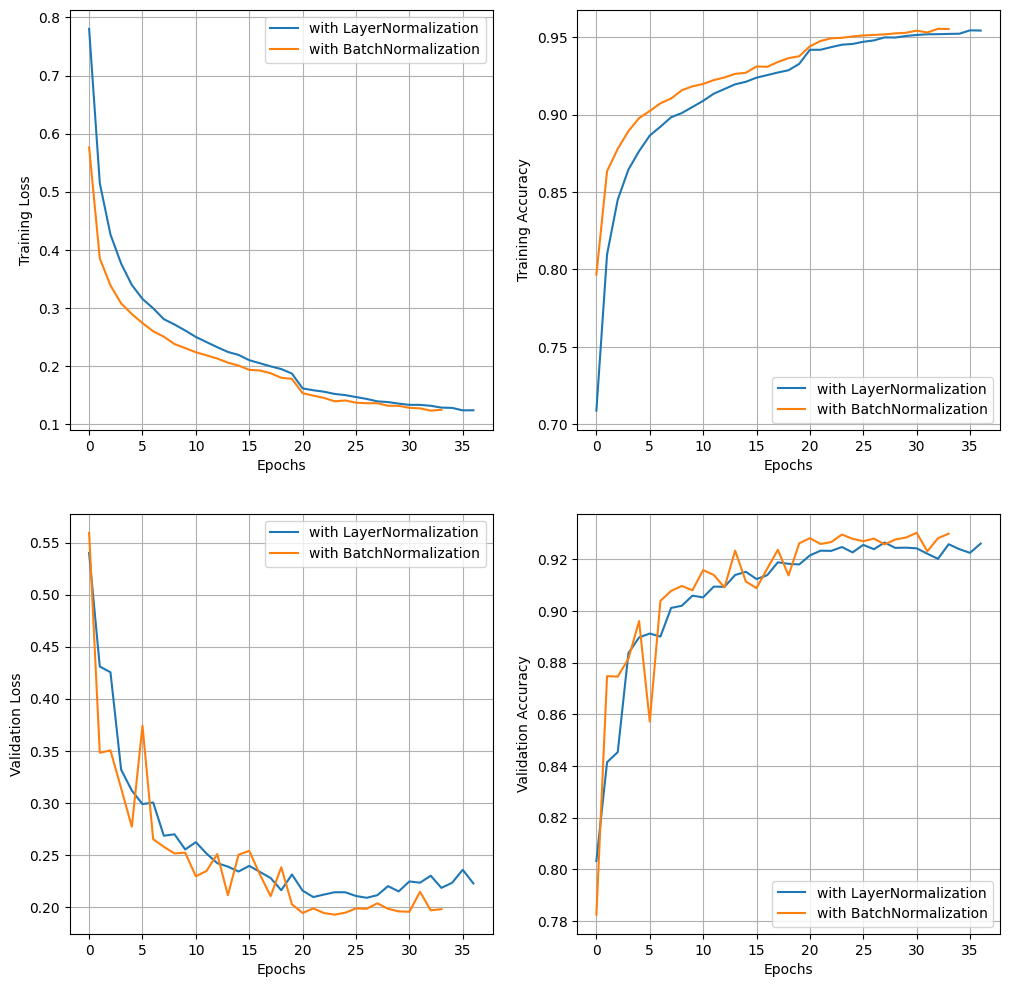

In [21]:
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.plot(history_model5.history['loss'],label='with LayerNormalization')
plt.plot(history_model6.history['loss'],label='with BatchNormalization')
plt.legend()
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.subplot(2,2,2)
plt.plot(history_model5.history['accuracy'],label='with LayerNormalization')
plt.plot(history_model6.history['accuracy'],label='with BatchNormalization')
plt.legend()
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.subplot(2,2,3)
plt.plot(history_model5.history['val_loss'],label='with LayerNormalization')
plt.plot(history_model6.history['val_loss'],label='with BatchNormalization')
plt.legend()
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.subplot(2,2,4)
plt.plot(history_model5.history['val_accuracy'],label='with LayerNormalization')
plt.plot(history_model6.history['val_accuracy'],label='with BatchNormalization')
plt.legend()
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')

# Other Questions:


Q8. In your final model "model_best", retrain the model using "batch normalization layer" instead of "layer normalization".

a. Does this model get better results for this problem?

b. Explain why the model with Batch Normalization has fewer parameters than the one using Layer Normalization.

Q9. Which of these techniques can be applied to reduce model overfitting?

1. Layer Normalization
2. Changing SGD by ADAM as optimizer
3. Dropout
4. Data augmentation

Q10. Which of these statements about dropout is correct?

1. Dropout results in sparsity within the trained weights.
2. During testing, dropout is implemented using the inverted keep probability.
3. Increasing the keep probability of a layer enhances the regularization of its weights.
4. None of the above.

Q11. Given the following activation function
$
\texttt{LeakyReLU}(x)=
x \texttt{ if } x>0,
\alpha x \texttt{ if } x≤0
​$.

1. Derive the first derivative with respect to $x$.

2. What is the behavior of the derivative when $\alpha$ goes to zero?

3. How does this can affect backpropagation?



#ExtraPoints :

Q12. Given these two activation functions $\texttt{sigmoid}=\frac{1}{1+\exp(-x)}$ and $\texttt{tanh}(x) = \frac{\exp(x)−\exp(−x)}{\exp(x)+\exp(−x)}$

Show for what value of $a,b$, $ a\texttt{sigmoid}(2x) - b = \texttt{tanh}(x)$


Q13. Given this two well known activation functions:

$\texttt{swish}(x,\beta)= x \texttt{sigmoid}(\beta x)= \frac{x}{1+ \exp^{-\beta x}}$

and,

$\texttt{Relu}(x)=\max(x,0)$

Show that $\texttt{swish}(x,\beta)\to \texttt{Relu}(x)$ when $\beta \to \infty$






### Q8, a : Does this model get better results for this problem?

Both models perform similarly on this problem. There are no significant differences in terms of loss and accuracy across all tests.

### Q8, b :  

### Q9 : Techniques to avoid overfitting

Data augmentation is widely used to avoid over fitting. Indeed, it enable the model to learn from poorer data (cropped images, rotation, scaling,...) and improve generalization to unseen data.

Dropout is also a well known technique used to avoid overfitting. By randomly "dropping out" neurons, it forces the model to learn global structure and not rely on ultra-specific paterns

###Q10 : Dropout
Only one statement is true:

During testing, dropout is not applied but the network's are scaled by the inverted keep probability.

###  Q11, a : Deriving the first derivative of the Leaky ReLU activation function

The Leaky ReLU activation function is defined as:

$$
\text{LeakyReLU}(x) =
\begin{cases}
x & \text{if } x > 0 \\
\alpha x & \text{if } x \leq 0
\end{cases}
$$

where α is a small positive constant, typically α ∊ [0, 1].

We can compute the first derivative of LeakyReLU(x) as follows:

$$
\text{LeakyReLU'}(x) =
\begin{cases}
1 & \text{if } x > 0 \\
\alpha & \text{if } x \leq 0
\end{cases}
$$


### Q11, b : Behavior of the derivative when α tend to 0

As α approaches zero, the derivative for x < 0 also approaches zero. The first derivative become:

$$
\text{When} \, \alpha \to 0, f'(x) = 0 \quad \text{for} \, x \leq 0 \
$$

Therefore, the behavior of the Leaky ReLU derivative approaches that of the standard ReLU function

$$
\text{When} \, \alpha \to 0, \text{LeakyReLU'}(x) \to \text{ReLU}(x)
$$

With this behavior, the gradient will be zero for negative inputs.

### Q11, c : Impact on Backpropagation

When α tend to 0, LeakyReLU become similar to the standard ReLU function. So the issues with gradient vanishing reappear and the model does not learn when then outputs of its layers is negative.
The main benefit of using LeakyReLU over ReLU is stop the gradient vanishing by ensuring a small non negative gradient for x < 1

### Q12 : Sigmoid and Tanh
$$
\begin{equation} sigmoid(2x) = \frac{1}{1+e^{-2x}} = \frac{1}{1+e^{-x}e^{-x}} = \frac{1}{e^{-x}(e^{x}+e^{-x})} = \frac{e^x}{e^{x}+e^{-x}} \end{equation} \\
$$

$$
\begin{equation} \text{Also, }1 = \frac{e^x + e^{-x}}{e^x + e^{-x}} \text{ and } e^{x} - e^{-x} = 2e^{x} - e^{x} - e^{-x}  \end{equation} \\
$$

$$
\begin{equation} \text{Thus, }1 = 2sigmoid(2x) - 1 = \frac{2e^x}{e^{x}+e^{-x}} - \frac{e^x + e^{-x}}{e^x + e^{-x}} = \frac{2e^{x} - e^{x} - e^{-x}}{e^x + e^{-x}} = \frac{e^x - e^{-x}}{e^x + e^{-x}} = tanh(x) \end{equation} \\
$$

### Q13 : Behavior of Swish function when β tend to +∞

$$
\text{for x > 0 : } \\
\text{When} \, \beta \to ∞, \beta x \to ∞ \text{ so } \begin{equation} e^{-βx} \end{equation} \to 0 \\ \text{Thus when }\, \beta \to ∞,  x/(1+e^{-βx}) \to x \\ \text{So  swish(x)} \to \text{ReLU(x) for x > 0} \\
$$


$$
\text{for x } \leq \text {0 : } \\
\text{When} \, \beta \to ∞, \beta x \to -∞ \text{ so } \begin{equation} e^{-βx} \end{equation} \to ∞ \\ \text{Thus when }\, \beta \to ∞,  x/(1+e^{-βx}) \to 0 \\ \text{So  swish(x)} \to \text{ReLU(x) for x } \leq \text {0 :}  \\
$$

